In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
df=pd.read_csv('QVI_data.csv')
data=df.copy()

In [3]:
data['DATE']=pd.to_datetime(df['DATE'])

In [4]:
data.set_index('DATE',inplace=True,drop=True)

In [5]:
data.head()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-10-17,1000,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
2018-09-16,1002,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2019-03-07,1003,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
2019-03-08,1003,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
2018-11-02,1004,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [6]:
data.sort_index()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
DATE,,,,,,,,,,,
2018-07-01,104039,104,103937,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Premium
2018-07-01,118107,118,121300,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,COBS,RETIREES,Mainstream
2018-07-01,226024,226,226348,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
2018-07-01,152040,152,150459,25,Pringles SourCream Onion 134g,2,7.4,134,PRINGLES,YOUNG FAMILIES,Mainstream
2018-07-01,33140,33,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream
...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30,90228,90,88954,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Premium
2019-06-30,199122,199,198088,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,DORITOS,NEW FAMILIES,Premium
2019-06-30,199117,199,198068,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,DORITOS,MIDAGE SINGLES/COUPLES,Mainstream


In [7]:
data.reset_index(inplace=True)

In [8]:
pd.date_range(start='2018-07-01',end='2019-06-30').difference(data['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

Shops closed on Christmas

In [9]:
a=pd.pivot_table(data,values='TOT_SALES',index='DATE',aggfunc='sum')

In [10]:
a.head()

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [11]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0

In [12]:
c = a + b
c.fillna(0, inplace = True)
c.head()

,TOT_SALES
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [13]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)

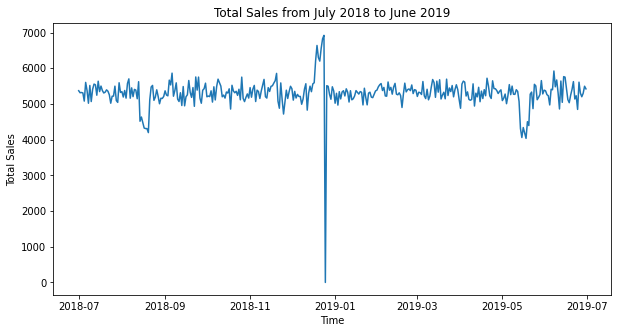

In [14]:
dates=c.index
vals=c['Total Sales']

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(dates,vals)
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

In [15]:
df2=df.copy()
df2.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [16]:
df2.dtypes

LYLTY_CARD_NBR        int64
DATE                 object
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PACK_SIZE             int64
BRAND                object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

In [17]:
df2['YEARMONTH']=[x.strftime("%Y%m") for x in data.DATE]

In [18]:
df2['YEARMONTH'] = pd.to_numeric(df2['YEARMONTH'])
df2['YEARMONTH'].head()

0    201810
1    201809
2    201903
3    201903
4    201811
Name: YEARMONTH, dtype: int64

In [19]:
df2.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,201810
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,201809
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,201903
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,201903
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,201811


In [20]:
totsales=df2.groupby(['STORE_NBR','YEARMONTH']).TOT_SALES.sum()
totsales

STORE_NBR  YEARMONTH
1          201807       206.9
           201808       176.1
           201809       278.8
           201810       188.1
           201811       192.6
                        ...  
272        201902       395.5
           201903       442.3
           201904       445.1
           201905       314.6
           201906       312.1
Name: TOT_SALES, Length: 3169, dtype: float64

In [21]:
ncustomers=df2.groupby(['STORE_NBR','YEARMONTH']).LYLTY_CARD_NBR.nunique()
ncustomers

STORE_NBR  YEARMONTH
1          201807       49
           201808       42
           201809       59
           201810       44
           201811       46
                        ..
272        201902       45
           201903       50
           201904       54
           201905       34
           201906       34
Name: LYLTY_CARD_NBR, Length: 3169, dtype: int64

In [22]:
nTxnPerCust = df2.groupby(['STORE_NBR', 'YEARMONTH']).TXN_ID.nunique() / df2.groupby(['STORE_NBR', 'YEARMONTH']).LYLTY_CARD_NBR.nunique()
nTxnPerCust

STORE_NBR  YEARMONTH
1          201807       1.061224
           201808       1.023810
           201809       1.050847
           201810       1.022727
           201811       1.021739
                          ...   
272        201902       1.066667
           201903       1.060000
           201904       1.018519
           201905       1.176471
           201906       1.088235
Length: 3169, dtype: float64

In [23]:
df=[totsales, ncustomers, nTxnPerCust]
measures=pd.concat(df,join='outer',axis=1)
measures

TOT_SALES  LYLTY_CARD_NBR         0
STORE_NBR YEARMONTH                                     
1         201807         206.9              49  1.061224
          201808         176.1              42  1.023810
          201809         278.8              59  1.050847
          201810         188.1              44  1.022727
          201811         192.6              46  1.021739
...                        ...             ...       ...
272       201902         395.5              45  1.066667
          201903         442.3              50  1.060000
          201904         445.1              54  1.018519
          201905         314.6              34  1.176471
          201906         312.1              34  1.088235

[3169 rows x 3 columns]

In [24]:
measures.rename(columns={'TOT_SALES': 'totSales', 'LYLTY_CARD_NBR': 'nCustomers', 0: 'nTxnPerCust'},inplace=True)

In [25]:
a=pd.pivot_table(df2,index='STORE_NBR',columns='YEARMONTH',values='TXN_ID',aggfunc='count')
a

YEARMONTH,201807,201808,201809,201810,201811,201812,201901,201902,201903,201904,201905,201906
STORE_NBR,,,,,,,,,,,,
1,52.0,43.0,62.0,45.0,47.0,47.0,36.0,55.0,49.0,43.0,51.0,43.0
2,41.0,43.0,37.0,43.0,40.0,38.0,45.0,32.0,46.0,49.0,50.0,42.0
3,138.0,134.0,119.0,119.0,118.0,129.0,121.0,139.0,130.0,110.0,123.0,122.0
4,160.0,151.0,138.0,155.0,139.0,133.0,168.0,102.0,135.0,137.0,126.0,134.0
5,120.0,112.0,125.0,107.0,111.0,125.0,118.0,106.0,97.0,109.0,104.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268,52.0,54.0,34.0,48.0,51.0,43.0,38.0,37.0,47.0,50.0,52.0,40.0
269,139.0,132.0,124.0,148.0,136.0,133.0,144.0,133.0,122.0,139.0,130.0,127.0
270,139.0,154.0,126.0,119.0,133.0,149.0,155.0,125.0,143.0,132.0,128.0,127.0


In [26]:
a.isnull().sum()

YEARMONTH
201807    6
201808    9
201809    8
201810    7
201811    8
201812    9
201901    9
201902    8
201903    7
201904    7
201905    9
201906    8
dtype: int64

In [27]:
null_stores=a[a.isnull().any(axis=1)].index.tolist()

In [28]:
measures.reset_index(inplace=True)

In [29]:
measures = measures[~measures['STORE_NBR'].isin(null_stores)]
len(measures)

3120

In [30]:
pretrialmeasures=measures.loc[measures['YEARMONTH']<201902,:]
pretrialmeasures.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust
0,1,201807,206.9,49,1.061224
1,1,201808,176.1,42,1.023810
2,1,201809,278.8,59,1.050847
3,1,201810,188.1,44,1.022727
4,1,201811,192.6,46,1.021739


In [31]:
def calculateCorrelation(inputTable,metric,trial_store):
    output=pd.DataFrame({'Store 1':[],'Store 2':[],'Correlation':[]})
    a=inputTable.loc[inputTable['STORE_NBR']==trial_store,metric]
    a.reset_index(drop=True,inplace=True)
    storenos=inputTable['STORE_NBR'].unique()
    for i in storenos:
        b=inputTable.loc[inputTable['STORE_NBR']==i,metric]
        b.reset_index(drop=True,inplace=True)
        output=output.append({'Store 1':trial_store,'Store 2':i,'Correlation':b.corr(a)},ignore_index=True)
    return output

In [32]:
def calculateMagnitudeDistance(inputTable, metric, trial_store):
    output = pd.DataFrame({'Store1': [], 'Store2': [], 'Magnitude' : []})
    a = inputTable.loc[inputTable['STORE_NBR'] == trial_store, metric]
    a.reset_index(drop = True, inplace = True)
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        b = inputTable.loc[inputTable['STORE_NBR'] == i, metric]
        b.reset_index(drop = True, inplace = True)
        c = abs(a-b)
        d = np.mean(1-(c-min(c))/(max(c)-min(c)))
        output = output.append({'Store1': trial_store, 'Store2': i, 'Magnitude': d}, ignore_index = True)
    return output

#### Finding control store for store no. 77 

In [33]:
trial_store = 77
corr_nSales = calculateCorrelation(pretrialmeasures, 'totSales', trial_store)
corr_nCustomers = calculateCorrelation(pretrialmeasures, 'nCustomers', trial_store)

magnitude_nSales = calculateMagnitudeDistance(pretrialmeasures, 'totSales', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(pretrialmeasures, 'nCustomers', trial_store)

In [34]:
corr_nSales.head()

,Store 1,Store 2,Correlation
0,77.0,1.0,0.075218
1,77.0,2.0,-0.263079
2,77.0,3.0,0.806644
3,77.0,4.0,-0.263300
4,77.0,5.0,-0.110652


In [35]:
magnitude_nSales.head()

,Store1,Store2,Magnitude
0,77.0,1.0,0.408163
1,77.0,2.0,0.590119
2,77.0,3.0,0.522914
3,77.0,4.0,0.644934
4,77.0,5.0,0.516320


In [36]:
score_nSales = pd.concat([corr_nSales, magnitude_nSales['Magnitude']], axis = 1)
corr_weight = 0.5
score_nSales['scoreNSales'] = corr_weight * score_nSales['Correlation'] + (1 - corr_weight) * score_nSales['Magnitude']
score_nSales.head()

,Store 1,Store 2,Correlation,Magnitude,scoreNSales
0,77.0,1.0,0.075218,0.408163,0.241691
1,77.0,2.0,-0.263079,0.590119,0.163520
2,77.0,3.0,0.806644,0.522914,0.664779
3,77.0,4.0,-0.263300,0.644934,0.190817
4,77.0,5.0,-0.110652,0.516320,0.202834


In [37]:
score_nCustomers = pd.concat([corr_nCustomers, magnitude_nCustomers['Magnitude']], axis = 1)
score_nCustomers['scoreNCust'] = corr_weight * score_nCustomers['Correlation'] + (1 - corr_weight) * score_nCustomers['Magnitude']
score_nCustomers.head()

,Store 1,Store 2,Correlation,Magnitude,scoreNCust
0,77.0,1.0,0.322168,0.663866,0.493017
1,77.0,2.0,-0.572051,0.471429,-0.050311
2,77.0,3.0,0.834207,0.489796,0.662002
3,77.0,4.0,-0.295639,0.498258,0.101310
4,77.0,5.0,0.370659,0.512605,0.441632


In [38]:
score_nSales.set_index(['Store 1', 'Store 2'], inplace = True)
score_nCustomers.set_index(['Store 1', 'Store 2'], inplace = True)
score_Control = pd.concat([score_nSales['scoreNSales'], score_nCustomers['scoreNCust']], axis = 1)
score_Control

scoreNSales  scoreNCust
Store 1 Store 2                         
77.0    1.0         0.241691    0.493017
        2.0         0.163520   -0.050311
        3.0         0.664779    0.662002
        4.0         0.190817    0.101310
        5.0         0.202834    0.441632
...                      ...         ...
        268.0       0.387272    0.470473
        269.0       0.121684    0.005090
        270.0       0.453489    0.202710
        271.0       0.348289    0.174100
        272.0       0.320626    0.384336

[260 rows x 2 columns]

In [39]:
score_Control['finalControlScore'] = 0.5 * (score_Control['scoreNSales'] + score_Control['scoreNCust'])
score_Control.head()

scoreNSales  scoreNCust  finalControlScore
Store 1 Store 2                                            
77.0    1.0         0.241691    0.493017           0.367354
        2.0         0.163520   -0.050311           0.056604
        3.0         0.664779    0.662002           0.663390
        4.0         0.190817    0.101310           0.146064
        5.0         0.202834    0.441632           0.322233

In [40]:
score_Control.sort_values(by = 'finalControlScore', ascending = False).head()

scoreNSales  scoreNCust  finalControlScore
Store 1 Store 2                                            
77.0    233.0       0.697290    0.816607           0.756949
        71.0        0.789497    0.663123           0.726310
        84.0        0.656972    0.715000           0.685986
        119.0       0.636046    0.729729           0.682887
        115.0       0.708347    0.645155           0.676751

#### Control store for store no. 77 is store no. 233

In [41]:
control_store=233

In [42]:
pastSales=pretrialmeasures

store_type = []

for i in pastSales['STORE_NBR']:
    if i == trial_store:
        store_type.append('Trial Store')
    elif i == control_store:
        store_type.append('Control Store')
    else:
        store_type.append('Other Stores')

pastSales['store_type'] = store_type
pastSales.head()

C:\Users\bhavy\AppData\Local\Temp/ipykernel_13988/1324352036.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['store_type'] = store_type


,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,store_type
0,1,201807,206.9,49,1.061224,Other Stores
1,1,201808,176.1,42,1.023810,Other Stores
2,1,201809,278.8,59,1.050847,Other Stores
3,1,201810,188.1,44,1.022727,Other Stores
4,1,201811,192.6,46,1.021739,Other Stores


In [43]:
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')

C:\Users\bhavy\AppData\Local\Temp/ipykernel_13988/2343704473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format = '%Y%m')


In [44]:
pastSales.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,Other Stores,2018-11-01


In [45]:
controlSalesPlot=pastSales.loc[pastSales['store_type']=='Control Store',['TransactionMonth','totSales']]
controlSalesPlot.set_index('TransactionMonth',inplace=True)
controlSalesPlot.rename(columns={'totSales':'Control Sales'},inplace=True)

trialSalesPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TransactionMonth', 'totSales']]
trialSalesPlot.set_index('TransactionMonth', inplace = True)
trialSalesPlot.rename(columns = {'totSales': 'Trial Store'}, inplace = True)

combineSalesPlot = pd.concat([controlSalesPlot, trialSalesPlot], axis = 1)
combineSalesPlot

,Control Sales,Trial Store
TransactionMonth,,
2018-07-01,290.7,296.8
2018-08-01,285.9,255.5
2018-09-01,228.6,225.2
2018-10-01,185.7,204.5
2018-11-01,211.6,245.3
2018-12-01,279.8,267.3
2019-01-01,177.5,204.4


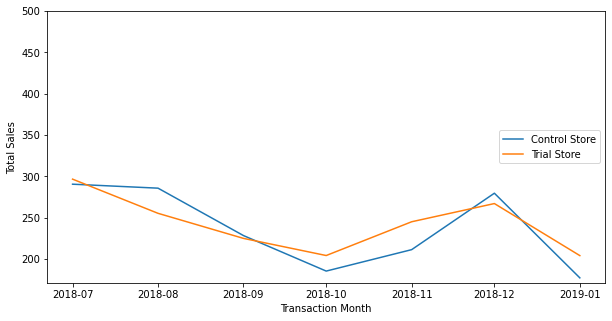

In [46]:
plt.figure(figsize=(10,5))
plt.plot(combineSalesPlot)
plt.ylim(top=500)
plt.xlabel('Transaction Month')
plt.ylabel("Total Sales")
plt.legend(['Control Store', 'Trial Store'], loc = 5)

In [47]:
controlCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Control Store', ['TransactionMonth', 'nCustomers']]
controlCustomersPlot.set_index('TransactionMonth', inplace = True)
controlCustomersPlot.rename(columns = {'nCustomers': 'Control Store'}, inplace = True)
trialCustomersPlot = pastSales.loc[pastSales['store_type'] == 'Trial Store', ['TransactionMonth', 'nCustomers']]
trialCustomersPlot.set_index('TransactionMonth', inplace = True)
trialCustomersPlot.rename(columns = {'nCustomers': 'Trial Store'}, inplace = True)

combineCustomersPlot = pd.concat([controlCustomersPlot, trialCustomersPlot], axis = 1)
combineCustomersPlot

,Control Store,Trial Store
TransactionMonth,,
2018-07-01,51,51
2018-08-01,48,47
2018-09-01,42,42
2018-10-01,35,37
2018-11-01,40,41
2018-12-01,47,46
2019-01-01,35,35


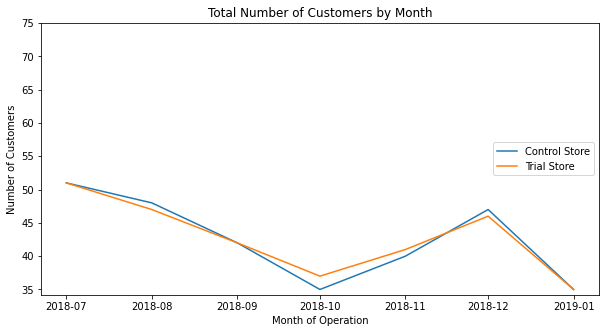

In [48]:
plt.figure(figsize = (10, 5))
plt.plot(combineCustomersPlot)
plt.ylim(top=75)
plt.title('Total Number of Customers by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Number of Customers')
plt.legend(['Control Store', 'Trial Store'], loc = 5)

In [49]:
import matplotlib.dates as mdates

In [50]:
pretrialmeasures

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,store_type,TransactionMonth
0,1,201807,206.9,49,1.061224,Other Stores,2018-07-01
1,1,201808,176.1,42,1.023810,Other Stores,2018-08-01
2,1,201809,278.8,59,1.050847,Other Stores,2018-09-01
3,1,201810,188.1,44,1.022727,Other Stores,2018-10-01
4,1,201811,192.6,46,1.021739,Other Stores,2018-11-01
...,...,...,...,...,...,...,...
3159,272,201809,304.7,32,1.125000,Other Stores,2018-09-01
3160,272,201810,430.6,44,1.136364,Other Stores,2018-10-01
3161,272,201811,376.2,41,1.097561,Other Stores,2018-11-01
3162,272,201812,403.9,47,1.000000,Other Stores,2018-12-01


In [51]:
trial_sum=pretrialmeasures.loc[pretrialmeasures['store_type']=='Trial Store','totSales'].sum()
control_sum=pretrialmeasures.loc[pretrialmeasures['store_type']=='Control Store','totSales'].sum()
scaling_factor=trial_sum/control_sum
scaling_factor

1.023617303289553

In [52]:
scaledcontrolsales=measures

In [53]:
scaledcontrolsales=scaledcontrolsales.loc[scaledcontrolsales['STORE_NBR']==control_store]
scaledcontrolsales

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust
2699,233,201807,290.7,51,1.058824
2700,233,201808,285.9,48,1.041667
2701,233,201809,228.6,42,1.071429
2702,233,201810,185.7,35,1.028571
2703,233,201811,211.6,40,1.025000
2704,233,201812,279.8,47,1.063830
2705,233,201901,177.5,35,1.000000
2706,233,201902,244.0,45,1.044444
2707,233,201903,199.1,40,1.025000
2708,233,201904,158.6,30,1.066667


In [54]:
scaledcontrolsales['controlSales']=scaledcontrolsales['totSales']*scaling_factor
scaledcontrolsales.head()

C:\Users\bhavy\AppData\Local\Temp/ipykernel_13988/2550151068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['controlSales']=scaledcontrolsales['totSales']*scaling_factor


,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,controlSales
2699,233,201807,290.7,51,1.058824,297.565550
2700,233,201808,285.9,48,1.041667,292.652187
2701,233,201809,228.6,42,1.071429,233.998916
2702,233,201810,185.7,35,1.028571,190.085733
2703,233,201811,211.6,40,1.025000,216.597421


In [55]:
percentageDiff=scaledcontrolsales[['YEARMONTH','controlSales']]
percentageDiff.reset_index(drop = True, inplace = True)

trialSales = measures.loc[measures['STORE_NBR'] == trial_store, 'totSales']
trialSales.reset_index(drop = True, inplace = True)
percentageDiff = pd.concat([percentageDiff, trialSales], axis = 1)
percentageDiff.rename(columns = {'totSales': 'trialSales'}, inplace = True)

percentageDiff

,YEARMONTH,controlSales,trialSales
0,201807,297.565550,296.8
1,201808,292.652187,255.5
2,201809,233.998916,225.2
3,201810,190.085733,204.5
4,201811,216.597421,245.3
5,201812,286.408121,267.3
6,201901,181.692071,204.4
7,201902,249.762622,235.0
8,201903,203.802205,278.5
9,201904,162.345704,263.5


In [56]:
percentageDiff['percentageDiff'] = abs(percentageDiff.controlSales - percentageDiff.trialSales) / percentageDiff.controlSales
percentageDiff

,YEARMONTH,controlSales,trialSales,percentageDiff
0,201807,297.565550,296.8,0.002573
1,201808,292.652187,255.5,0.126950
2,201809,233.998916,225.2,0.037602
3,201810,190.085733,204.5,0.075830
4,201811,216.597421,245.3,0.132516
5,201812,286.408121,267.3,0.066716
6,201901,181.692071,204.4,0.124980
7,201902,249.762622,235.0,0.059107
8,201903,203.802205,278.5,0.366521
9,201904,162.345704,263.5,0.623080


In [57]:
from statistics import stdev
from scipy.stats import t

In [58]:
stdDev = stdev(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])
stdDev

0.049940762641425544

In [59]:
dof=7

In [60]:
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff.loc[(percentageDiff['YEARMONTH'] > 201901) & (percentageDiff['YEARMONTH'] < 201905), 'tValue']

7     1.183534
8     7.339116
9    12.476373
Name: tValue, dtype: float64

In [61]:
t.isf(0.05,dof)

1.8945786050613054

Null Hypothesis- There is no significanct difference in the total sales during the trial and control period.

T-test suggests that we should reject the null hypothesis impyling that there was a significant difference in the sales during the trial and control period.

In [62]:
scaledcontrolsales.head()

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,controlSales
2699,233,201807,290.7,51,1.058824,297.565550
2700,233,201808,285.9,48,1.041667,292.652187
2701,233,201809,228.6,42,1.071429,233.998916
2702,233,201810,185.7,35,1.028571,190.085733
2703,233,201811,211.6,40,1.025000,216.597421


In [63]:
scaledcontrolsales['TransactionMonth']=pd.to_datetime(scaledcontrolsales['YEARMONTH'].astype(str),format='%Y%m')
scaledcontrolsales

C:\Users\bhavy\AppData\Local\Temp/ipykernel_13988/1429790458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledcontrolsales['TransactionMonth']=pd.to_datetime(scaledcontrolsales['YEARMONTH'].astype(str),format='%Y%m')


,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,controlSales,TransactionMonth
2699,233,201807,290.7,51,1.058824,297.565550,2018-07-01
2700,233,201808,285.9,48,1.041667,292.652187,2018-08-01
2701,233,201809,228.6,42,1.071429,233.998916,2018-09-01
2702,233,201810,185.7,35,1.028571,190.085733,2018-10-01
2703,233,201811,211.6,40,1.025000,216.597421,2018-11-01
2704,233,201812,279.8,47,1.063830,286.408121,2018-12-01
2705,233,201901,177.5,35,1.000000,181.692071,2019-01-01
2706,233,201902,244.0,45,1.044444,249.762622,2019-02-01
2707,233,201903,199.1,40,1.025000,203.802205,2019-03-01
2708,233,201904,158.6,30,1.066667,162.345704,2019-04-01


In [64]:
controlSales=scaledcontrolsales.loc[:,['TransactionMonth','controlSales']]
controlSales.set_index('TransactionMonth',inplace=True)
controlSales

,controlSales
TransactionMonth,
2018-07-01,297.565550
2018-08-01,292.652187
2018-09-01,233.998916
2018-10-01,190.085733
2018-11-01,216.597421
2018-12-01,286.408121
2019-01-01,181.692071
2019-02-01,249.762622
2019-03-01,203.802205


In [65]:
measures

,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust
0,1,201807,206.9,49,1.061224
1,1,201808,176.1,42,1.023810
2,1,201809,278.8,59,1.050847
3,1,201810,188.1,44,1.022727
4,1,201811,192.6,46,1.021739
...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667
3165,272,201903,442.3,50,1.060000
3166,272,201904,445.1,54,1.018519
3167,272,201905,314.6,34,1.176471


In [66]:
measures['TransactionMonth']=pd.to_datetime(measures['YEARMONTH'].astype(str),format="%Y%m")
measures

C:\Users\bhavy\AppData\Local\Temp/ipykernel_13988/2050939707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measures['TransactionMonth']=pd.to_datetime(measures['YEARMONTH'].astype(str),format="%Y%m")


,STORE_NBR,YEARMONTH,totSales,nCustomers,nTxnPerCust,TransactionMonth
0,1,201807,206.9,49,1.061224,2018-07-01
1,1,201808,176.1,42,1.023810,2018-08-01
2,1,201809,278.8,59,1.050847,2018-09-01
3,1,201810,188.1,44,1.022727,2018-10-01
4,1,201811,192.6,46,1.021739,2018-11-01
...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,2019-02-01
3165,272,201903,442.3,50,1.060000,2019-03-01
3166,272,201904,445.1,54,1.018519,2019-04-01
3167,272,201905,314.6,34,1.176471,2019-05-01


In [67]:
trialSales = measures.loc[measures['STORE_NBR'] == trial_store, ['TransactionMonth', 'totSales']]
trialSales.set_index('TransactionMonth', inplace = True)
trialSales.rename(columns = {'totSales': 'Trial Sales'}, inplace = True)
trialSales

,Trial Sales
TransactionMonth,
2018-07-01,296.8
2018-08-01,255.5
2018-09-01,225.2
2018-10-01,204.5
2018-11-01,245.3
2018-12-01,267.3
2019-01-01,204.4
2019-02-01,235.0
2019-03-01,278.5


Making a 95% confidence interval.

In [68]:
controlSales['Control 5% Confidence Interval'] = controlSales['controlSales'] * (1 - stdDev*2)
controlSales['Control 95% Confidence Interval'] = controlSales['controlSales'] * (1 + stdDev*2)
controlSales

,controlSales,Control 5% Confidence Interval,Control 95% Confidence Interval
TransactionMonth,,,
2018-07-01,297.565550,267.844249,327.286851
2018-08-01,292.652187,263.421640,321.882734
2018-09-01,233.998916,210.626747,257.371084
2018-10-01,190.085733,171.099680,209.071786
2018-11-01,216.597421,194.963341,238.231502
2018-12-01,286.408121,257.801241,315.015001
2019-01-01,181.692071,163.544390,199.839753
2019-02-01,249.762622,224.815950,274.709294
2019-03-01,203.802205,183.446130,224.158280


In [69]:
combineSales = pd.merge(controlSales, trialSales, left_index = True, right_index = True)
combineSales

,controlSales,Control 5% Confidence Interval,Control 95% Confidence Interval,Trial Sales
TransactionMonth,,,,
2018-07-01,297.565550,267.844249,327.286851,296.8
2018-08-01,292.652187,263.421640,321.882734,255.5
2018-09-01,233.998916,210.626747,257.371084,225.2
2018-10-01,190.085733,171.099680,209.071786,204.5
2018-11-01,216.597421,194.963341,238.231502,245.3
2018-12-01,286.408121,257.801241,315.015001,267.3
2019-01-01,181.692071,163.544390,199.839753,204.4
2019-02-01,249.762622,224.815950,274.709294,235.0
2019-03-01,203.802205,183.446130,224.158280,278.5


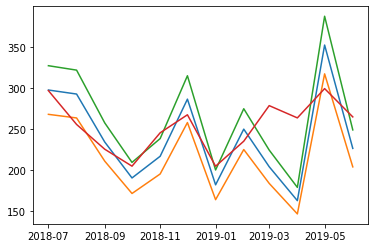

In [70]:
plt.plot(combineSales)

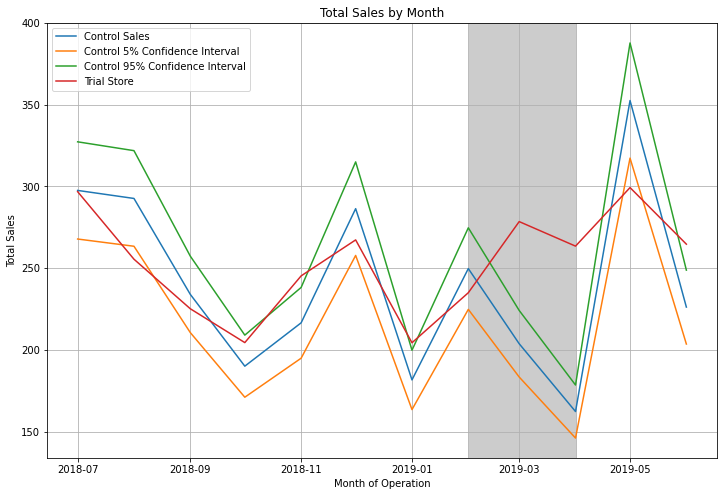

In [72]:
plt.figure(figsize=(12,8))
plt.plot(combineSales)

plt.title('Total Sales by Month')
plt.xlabel('Month of Operation')
plt.ylabel('Total Sales')

plt.legend(['Control Sales', 'Control 5% Confidence Interval', 'Control 95% Confidence Interval', 'Trial Store'], loc = 2)
plt.ylim(top=400)

plt.axvspan(*mdates.datestr2num(['2019-02-01', '2019-04-01']),color='grey',alpha=0.4)

plt.grid()
plt.show()